In [122]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

In [123]:
df = pd.read_csv('C:\\Arquivos\\Programas\\python\\birdie2020\\crawler\\LowesCrawler\\lowescrawler\\spiders\\lowes.csv')
df.head()

,Id,Titulo,Modelo,Marca,Estrelas,Avaliacoes,Url
0,852884,18-cu ft Top-Freezer Refrigerator (White),FFTR1814TW,Frigidaire,4.5,12552,https://www.lowes.com/pd/Frigidaire-18-cu-ft-T...
1,712177,24.52-cu ft Side-by-Side Refrigerator with Ice...,RS25J500DSR,Samsung,3.5,552,https://www.lowes.com/pd/Samsung-24-52-cu-ft-S...
2,1030901,24.6-cu ft Side-by-Side Refrigerator with Ice ...,WRS315SDHZ,Whirlpool,4.5,1806,https://www.lowes.com/pd/Whirlpool-24-6-cu-ft-...
3,852875,26.8-cu ft French Door Refrigerator with Ice M...,FFHB2750TD,Frigidaire,4.5,4044,https://www.lowes.com/pd/Frigidaire-26-8-cu-ft...
4,618013,26.2-cu ft Side-by-Side Refrigerator with Ice ...,LSXS26326S,LG,4.0,1000,https://www.lowes.com/pd/LG-26-2-cu-ft-Side-by...


In [124]:
df = df.drop_duplicates()

In [125]:
df.describe()

,Id,Estrelas,Avaliacoes
count,2.250000e+02,225.000000,225.000000
mean,1.164320e+06,4.235556,1066.480000
std,6.147737e+05,0.422659,1608.710095
min,3.526800e+04,1.500000,1.000000
25%,6.603220e+05,4.000000,120.000000
50%,9.303030e+05,4.500000,344.000000
75%,1.392374e+06,4.500000,1296.000000
max,2.569141e+06,4.500000,12552.000000


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225 entries, 0 to 263
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          225 non-null    int64  
 1   Titulo      225 non-null    object 
 2   Modelo      225 non-null    object 
 3   Marca       225 non-null    object 
 4   Estrelas    225 non-null    float64
 5   Avaliacoes  225 non-null    int64  
 6   Url         225 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 14.1+ KB


# Visualização

In [127]:
d_estrelas = {}
d_avaliacoes = {}
for m in df['Marca'].unique():
    d_estrelas.update({m:df[df['Marca'] ==  m]['Estrelas'].mean()})
    d_avaliacoes.update({m:df[df["Marca"] ==  m]['Avaliacoes'].sum()})

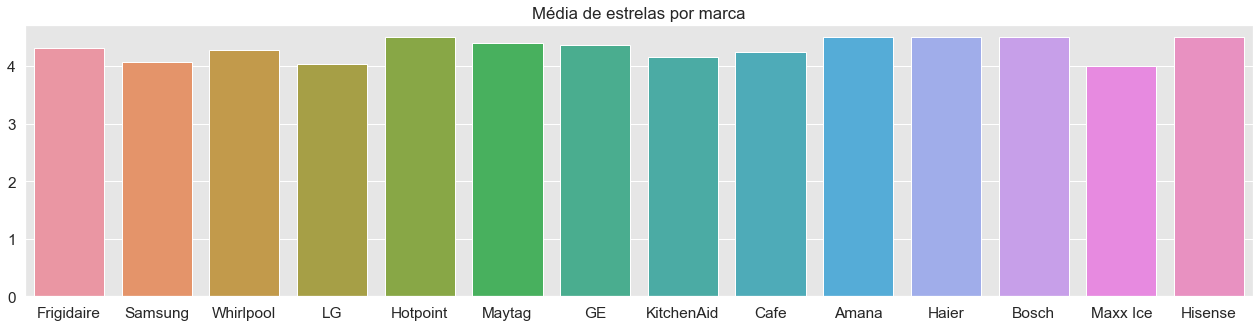

In [128]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(22, 5))
plt.title("Média de estrelas por marca")
sns.barplot(x=list(d_estrelas.keys()), y=list(d_estrelas.values()))

In [129]:
d_avaliacoes_order = {k: v for k, v in sorted(d_avaliacoes.items(), key=lambda item: item[1],
                           reverse=True)}

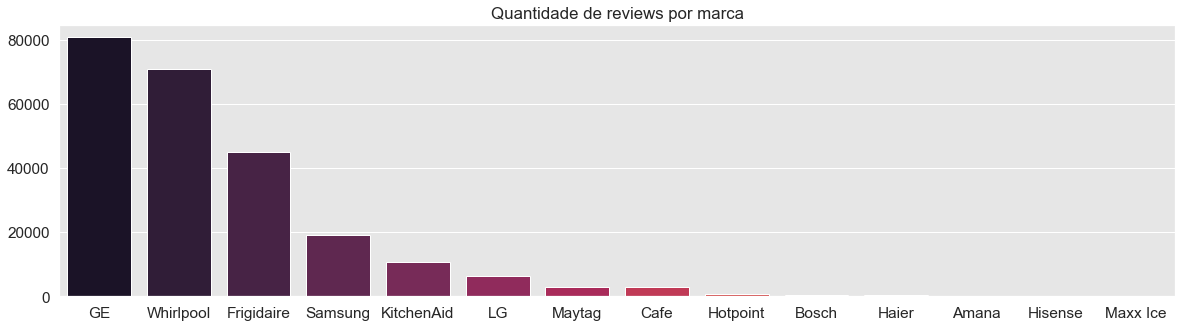

In [130]:
plt.figure(figsize=(20, 5))
plt.title("Quantidade de reviews por marca")
sns.barplot(x=list(d_avaliacoes_order.keys()), y=list(d_avaliacoes_order.values()), palette='rocket')